# Goal is to answer the question: can a machine detect a person's gender based on their tweet?

Steps:
1. Get twitter data
2. Clean data
3. Build model
5. Test model

## 1. Get Twitter data

In [1]:
# Import libraries
import json
import pprint
import tweepy as tw
import pandas as pd

In [9]:
# Connect to twitter API
path_auth = '/Users/allenj/Documents/Keys/auth_twitter.json'
auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)

my_consumer_key = auth['my_consumer_key']
my_consumer_secret = auth['my_consumer_secret']
my_access_token = auth['your_access_token']
my_access_token_secret = auth['my_access_token_secret']

auth = tw.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tw.API(auth)

type(api)

tweepy.api.API

In [610]:
# Upload list of desired users
# Gender 0 = male, 1 = female
users = pd.read_csv('Data/twitter-users3.csv')
users

,user,name,gender,followers_millions,activity
0,BarackObama,Barack Obama,0,118.0,Politician
1,katyperry,Katy Perry,1,108.0,Musician
2,rihanna,Rihanna,1,96.0,Musician
3,taylorswift13,Taylor Swift,1,86.0,Musician
4,Cristiano,Cristiano Ronaldo,0,84.0,Athlete
5,realDonaldTrump,Donald Trump,0,82.0,Politician
6,ladygaga,Lady Gaga,1,81.0,Musician
7,TheEllenShow,Ellen DeGeneres,1,80.0,Comedian
8,ArianaGrande,Ariana Grande,1,74.0,Musician
9,KimKardashian,Kim Kardashian,1,65.0,Celebrity


In [595]:
# Count percentage of male and female users
# Gender 0 = male, 1 = female
users.gender.value_counts(normalize=True, sort=False)

0    0.48
1    0.52
Name: gender, dtype: float64

In [611]:
# Get collection of tweets from these usernames and store it into a new dataframe
list = []

for index, row in users.iterrows():
    tweets = api.user_timeline(screen_name=row['user'], count=150, include_rts=False)
    users_text = [[tweet.user.screen_name, tweet.text, row['gender']] for tweet in tweets]
    tweet_text = pd.DataFrame(data=users_text, 
                        columns=["user", "text", "gender"])
    list.append(tweet_text)

# Merge the list    
tweets = pd.concat(list) 

In [612]:
tweets

,user,text,gender
0,BarackObama,As has always been true at key moments in hist...,0
1,BarackObama,We’ve seen the power that our voices have when...,0
2,BarackObama,"On National Gun Violence Awareness Day, we #We...",0
3,BarackObama,"Third, every city in this country should be a ...",0
4,BarackObama,"Second, every mayor should review their use of...",0
...,...,...,...
74,justdemi,Throwback to the world premiere of corporatean...,1
75,justdemi,Thank you nytimes for helping me share my stor...,1
76,justdemi,My first headshot… sneak peek #InsideOutBook. ...,1
77,justdemi,"A favorite from #InsideOutBook, bundled up wit...",1


In [391]:
# Count percentage of male and female users
# Gender 0 = male, 1 = female
tweets.gender.value_counts(normalize=True, sort=False)

0    0.481456
1    0.518544
Name: gender, dtype: float64

In [392]:
# Export to csv for future reference
tweets.to_csv('Data/tweets3.csv')

## 2. Clean data

In [2]:
# Import libraries
import numpy as np
import re
import spacy
from matplotlib import pyplot as plt

In [3]:
# Make it easier to reload the data instead of having to call the API everytime
tweets = pd.read_csv('Data/tweets3.csv')

In [4]:
tweets

,Unnamed: 0,user,text,gender
0,0,BarackObama,We’ve seen the power that our voices have when...,0
1,1,BarackObama,"On National Gun Violence Awareness Day, we #We...",0
2,2,BarackObama,"Third, every city in this country should be a ...",0
3,3,BarackObama,"Second, every mayor should review their use of...",0
4,4,BarackObama,"First, there are specific evidence-based refor...",0
...,...,...,...,...
5792,74,justdemi,Throwback to the world premiere of corporatean...,1
5793,75,justdemi,Thank you nytimes for helping me share my stor...,1
5794,76,justdemi,My first headshot… sneak peek #InsideOutBook. ...,1
5795,77,justdemi,"A favorite from #InsideOutBook, bundled up wit...",1


In [5]:
# Clean text
def clean_text(text):
    # Reduce multiple spaces and newlines to only one
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
    # Remove double quotes
    text = re.sub(r'"', '', text)

    return text

tweets['clean_text'] = tweets['text'].apply(clean_text)

In [6]:
# Remove hyperlinks
tweets['clean_text'] = tweets['clean_text'].str.replace('http\S+|www.\S+', '', case=False)

In [7]:
# Remove patterns
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

tweets['clean_text'] = np.vectorize(remove_pattern)(tweets['clean_text'], "@[\w]*") # Removes all @
tweets['clean_text'] = np.vectorize(remove_pattern)(tweets['clean_text'], "&amp;") # Removes all &
tweets['clean_text'] = np.vectorize(remove_pattern)(tweets['clean_text'], "#[\w]*") # Removes all #

In [8]:
# Remove stop words and lemmatize
nlp = spacy.load('en')

def convert_text(text):
    sent = nlp(text)
    ents = {x.text: x for x in sent.ents}
    tokens = []
    for w in sent:
        if w.is_stop or w.is_punct:
            continue
        if w.text in ents:
            tokens.append(w.text)
        else:
            tokens.append(w.lemma_.lower())
    text = ' '.join(tokens)

    return text

In [9]:
tweets['clean_text'] = tweets['clean_text'].apply(convert_text)

In [10]:
tweets.sample(15)

,Unnamed: 0,user,text,gender,clean_text
1788,72,ddlovato,Limited edition #ILoveMe vinyl &amp; cd availa...,1,limited edition vinyl cd available \n
1962,88,jimmyfallon,Did you know @SIRIUSXM is free until May 15th?...,0,know free 15th know host weekend countdown t
2809,75,Oprah,Ya’ll missed a PARTY on Saturday if you weren’...,1,ya’ll miss PARTY Saturday tune d nice IG sta...
5094,16,NICKIMINAJ,Ummm during the quarantine? I would if they ma...,1,ummm quarantine way guess sure feel good song
1091,25,ArianaGrande,many @AlfredoFlores https://t.co/BA62O6Gu3P,1,
5150,72,NICKIMINAJ,What’s your fave line? #YikesOutNow,1,fave line
4951,75,AvrilLavigne,3 week countdown till the Head Above \nWater T...,1,3 week countdown till head \n water tour begin...
4696,21,davidguetta,This is how a studio session looks like now 🙃🙃...,0,studio session look like 🙃 🙃
1210,55,KimKardashian,🤍 https://t.co/3AdxguXihw,1,🤍
5471,2,neiltyson,@tomeclarke @cm_richards FYI: We credit Copern...,0,FYI credit Copernicus get heliocentric view...


In [11]:
# Remove punctuation, numbers, and special characters
tweets['clean_text'] = tweets['clean_text'].str.replace("[^a-zA-Z#]", " ")

In [12]:
# Remove short words less than 3
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [13]:
# Count the length of characters 
tweets['clean_length'] = tweets['clean_text'].apply(len)

In [14]:
# Remove rows where character length <= 20
tweets = tweets[tweets.clean_length > 20]

In [15]:
tweets.sample(n=15)

,Unnamed: 0,user,text,gender,clean_text,clean_length
140,140,BarackObama,Proud to see Oluwaseun @AyodejiOsowobi in this...,0,Proud oluwaseun list leader organize young people,49
3094,7,KevinHart4real,This is an amazing display of justice....This ...,0,amazing display justice step right direction work,49
1356,25,selenagomez,Things to do today: 1) Stay safe at home. 2) L...,1,thing today stay safe home listen boyfriend to...,54
2995,32,NiallOfficial,Poor Tom Brady. If he wants back in to this ga...,0,poor brady want game golf pick ball throw,41
1677,87,britneyspears,Today is @GLAAD #SpiritDay! Let’s show our sup...,1,Today support LGBTQ youth stand bullying pledge,47
1034,113,TheEllenShow,This week was #TeacherAppreciationWeek. I am s...,1,week grateful opportunity meet incredible educ...,50
4473,69,priyankachopra,Im honored to have been a part of One World #T...,1,honor world night watch talent real,35
1555,113,narendramodi,Greetings to Union Minister Shri @TCGEHLOT Ji ...,0,greeting Union minister Shri birthday almighty...,70
2916,46,Drake,New Dates Added\nCanada Pre-Sales Start Today ...,0,dates Canada sale start Today american express,46
3032,69,NiallOfficial,Looking forward to watching live golf on Sunda...,0,look forward watch live golf Sunday,35


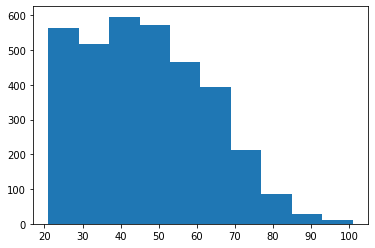

In [16]:
plt.hist(tweets['clean_length'])
plt.show()

## 3. Build Model

In [17]:
# Import libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [18]:
# Bag-of-Words features
bow_vectorizer = CountVectorizer(stop_words='english')

# Bag-of-Words feature matrix
bow = bow_vectorizer.fit_transform(tweets['clean_text'])
df_bow = pd.DataFrame(bow.todense(), columns=bow_vectorizer.get_feature_names())
df_bow

,aaaah,aapka,aapke,aapki,aarav,aatmanirbhar,abdur,aben,abhijit,abigail,...,zero,zimbabwe,zingers,zion,zohaib,zone,zoom,zoomiverse,zootopia,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Import testing set
testset = pd.read_csv('Data/twitter-test.csv')

# Bag-of-Words feature matrix
bow = bow_vectorizer.transform(testset['text'])
df_bow_test = pd.DataFrame(bow.todense(), columns=bow_vectorizer.get_feature_names())
df_bow_test

,aaaah,aapka,aapke,aapki,aarav,aatmanirbhar,abdur,aben,abhijit,abigail,...,zero,zimbabwe,zingers,zion,zohaib,zone,zoom,zoomiverse,zootopia,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Use Bag of Words to Build Model

In [53]:
# Splitting the data into training and test set
X = df_bow
y = tweets['gender']

# Use Bag-of-Words Features
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X, y, test_size=0.20)

### Use Deep Learning

In [54]:
# Import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import to_categorical

In [74]:
# Create model architecture
n_cols = X.shape[1]
model = Sequential()

# Add first hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))

# Add second hidden layer, 5 is arbitrary and hyperparameters
model.add(Dense(5, activation = 'relu'))

# Add output layer, use linear because it is regression
model.add(Dense(2, activation = 'softmax'))

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 15)                90300     
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 12        
Total params: 90,392
Trainable params: 90,392
Non-trainable params: 0
_________________________________________________________________
None


In [75]:
# Compile the model

# Optimizer tries to minimize the loss function after every epoch
# Depends on if regression, classification, etc

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [76]:
%%time
# insert code here
# Fit the model
model.fit(
    X_train_bow,
    y_train_bow,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 10,
    verbose = 1)

Epoch 1/10


ValueError: in user code:

    /Users/allenj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /Users/allenj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/allenj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/allenj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/allenj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:533 train_step  **
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /Users/allenj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:205 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/allenj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:143 __call__
        losses = self.call(y_true, y_pred)
    /Users/allenj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:246 call
        return self.fn(y_true, y_pred, **self._fn_kwargs)
    /Users/allenj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1527 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /Users/allenj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4561 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/allenj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1117 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 2) are incompatible


In [62]:
# insert code here
predictions = model.predict_classes(X_test_bow)
predictions

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [63]:
# insert code here
score = model.evaluate(X_test_bow, y_test_bow)

22/22 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4688


In [64]:
# Find RMSE
score[0] ** (1/2)

nan

In [65]:
y.mean()

0.5265602322206095

### Use Logistic Regression

In [737]:
# Fitting on Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_bow, y_train_bow)
prediction_bow = logreg.predict_proba(X_test_bow)

In [738]:
# Calculating the F1 score
# If prediction is greater than or equal to 0.5 than 1, else 0
# Gender, 0 = male and 1 = female
prediction_int = prediction_bow[:,1]>=0.5
prediction_int = prediction_int.astype(np.int)

# Calculating f1 score
log_bow = f1_score(y_test_bow, prediction_int)
log_bow

0.7256176853055917

### Predict with Test 

In [715]:
# Check if there is a fit model
logreg.intercept_, logreg.coef_

(array([0.00689264]),
 array([[0.03482684, 0.22181523, 0.16997305, ..., 0.        , 0.28753671,
         0.22108055]]))

In [716]:
# Predict probability
z = df_bow_test
pred_prob = logreg.predict_proba(z)
pred_prob = pd.DataFrame(data=pred_prob, columns=['percentage_0', 'percentage_1'])

# Predict classification
pred = logreg.predict(z)
pred = pd.DataFrame(data=pred, columns=['predicted_gender'])

# Store into the same DataFrame
result = pd.concat([testset, pred, pred_prob], axis=1, sort=False)
result

,name,gender,text,predicted_gender,percentage_0,percentage_1
0,Ariana Huffington,1,But you have to do what you dream of doing eve...,1,0.317286,0.682714
1,Barack Obama,0,"It’s World Health Day, and we owe a profound d...",0,0.938252,0.061748
2,Chamath Palihapitiya,0,"Make no mistake, we may be in a terrible place...",0,0.650609,0.349391
3,Jessica Alba,1,My biggest baby is 11 today! I’m so proud of t...,1,0.324963,0.675037
4,Jack Dorsey,0,"Why now? The needs are increasingly urgent, an...",0,0.778448,0.221552
5,Emma Watson,1,Don’t feel stupid if you don’t like what every...,1,0.153039,0.846961


In [691]:
result = pd.concat([testset, pred, pred_prob], axis=1, sort=False)
result

,name,gender,text,predicted_gender,percentage_0,percentage_1
0,Ariana Huffington,1,But you have to do what you dream of doing eve...,1,0.429663,0.570337
1,Barack Obama,0,"It’s World Health Day, and we owe a profound d...",0,0.907051,0.092949
2,Chamath Palihapitiya,0,"Make no mistake, we may be in a terrible place...",1,0.360368,0.639632
3,Jessica Alba,1,My biggest baby is 11 today! I’m so proud of t...,1,0.356702,0.643298
4,Jack Dorsey,0,"Why now? The needs are increasingly urgent, an...",0,0.629099,0.370901
5,Emma Watson,1,Don’t feel stupid if you don’t like what every...,1,0.124056,0.875944


### Use TF-IDF

In [717]:
# TF-IDF features (Term Frequency-Inverse Document Frequency)
tfidf=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(tweets['clean_text'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense(), columns=tfidf.get_feature_names())
df_tfidf

,aaaah,aapka,aapke,aapki,aarav,aatmanirbhar,abdur,aben,abhijit,abigail,...,zero,zimbabwe,zingers,zion,zohaib,zone,zoom,zoomiverse,zootopia,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [718]:
# Do the same for the test dataset
# TF-IDF features (Term Frequency-Inverse Document Frequency)
tfidf_matrix=tfidf.transform(testset['text'])
df_tfidf_test = pd.DataFrame(tfidf_matrix.todense(), columns=tfidf.get_feature_names())
df_tfidf_test

,aaaah,aapka,aapke,aapki,aarav,aatmanirbhar,abdur,aben,abhijit,abigail,...,zero,zimbabwe,zingers,zion,zohaib,zone,zoom,zoomiverse,zootopia,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [730]:
# Splitting the data into training and validation set
X = df_tfidf
y = tweets['gender']

# Use Bag-of-Words Features
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, test_size=0.2)

In [731]:
# Using TF-IDF Features
logreg.fit(X_train_tfidf, y_train_tfidf)
prediction_tfidf = logreg.predict_proba(X_test_tfidf)
prediction_tfidf

array([[0.2461721 , 0.7538279 ],
       [0.57963475, 0.42036525],
       [0.54093894, 0.45906106],
       ...,
       [0.27803541, 0.72196459],
       [0.32327333, 0.67672667],
       [0.48608484, 0.51391516]])

In [732]:
# Calculating the F1 score
prediction_int = prediction_tfidf[:,1]>=0.5
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_test_tfidf, prediction_int)
log_tfidf

0.6812339331619537

### Predict with Test

In [733]:
# Check if there is a fit model
logreg.intercept_, logreg.coef_

(array([-0.06546048]),
 array([[ 0.0690166 ,  0.19189442,  0.        , ..., -0.17631762,
          0.31015701,  0.19285343]]))

In [734]:
z = df_tfidf_test
pred = logreg.predict(z)
pred = pd.DataFrame(data=pred, columns=['predicted_gender'])
testset.join(pred)

,name,gender,text,predicted_gender
0,Ariana Huffington,1,But you have to do what you dream of doing eve...,1
1,Barack Obama,0,"It’s World Health Day, and we owe a profound d...",0
2,Chamath Palihapitiya,0,"Make no mistake, we may be in a terrible place...",0
3,Jessica Alba,1,My biggest baby is 11 today! I’m so proud of t...,1
4,Jack Dorsey,0,"Why now? The needs are increasingly urgent, an...",1
5,Emma Watson,1,Don’t feel stupid if you don’t like what every...,1
